    los cambios necesarios en camposcon valores erroneos los voy a hacer en power bi:

* GRAL PAZ como tipo de calle

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# carga de datos

In [3]:
excel_file = pd.ExcelFile(r"Datasets/homicidios.xlsx")
#excel_file.sheet_names

homicidios_hechos = excel_file.parse("HECHOS")
homicidios_victimas = excel_file.parse("VICTIMAS")
homicidios_clas = excel_file.parse("clas")

    en las siguientes categorias se encuentran unos analisis demasiado basicos por eso los deje comprimido aun asi se puede desplegar  y leer la primera linea de cada uno de los apartados donde guarde conclusiones sobre deciciones que eh de tomar al momento de trabajar el archivo en power bi

## hoja hechos(homicidios.xlsx)

In [4]:
homicidios_hechos.head()#homicidios_hechos.sample(10)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [6]:
homicidios_hechos["TIPO_DE_CALLE"] = homicidios_hechos["TIPO_DE_CALLE"].astype("category")
homicidios_hechos["PARTICIPANTES"] = homicidios_hechos["PARTICIPANTES"].astype("category")
homicidios_hechos["VICTIMA"] = homicidios_hechos["VICTIMA"].astype("category")
homicidios_hechos["ACUSADO"] = homicidios_hechos["ACUSADO"].astype("category")
homicidios_hechos["HH"] = homicidios_hechos["HH"].astype("category")
homicidios_hechos["COMUNA"] = homicidios_hechos["COMUNA"].astype("category")

In [7]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    category      
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    category      
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [8]:
homicidios_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura
count,696.000000,696,696.000000,696.000000,696.000000,129.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793


### columna "ID"

    esta columna:
* parece estar conformada por año-numerodesuceso ese año
* no tiene valores duplicados
* no tiene valores nulos

In [9]:
homicidios_hechos["ID"].duplicated().sum()#duplicados

0

In [10]:
homicidios_hechos["ID"].isna().sum()#nulos

0

### columna "N_VICTIMAS"

    esta columna:
* no posee nulos
* tiene 3 valores distitos indicando que se tienen registrado casos entre (1,2 y 3 victimas)

In [11]:
homicidios_hechos["N_VICTIMAS"].isna().sum()#nulos

0

In [12]:
homicidios_hechos["N_VICTIMAS"].value_counts()#registros por cantidad de victimas

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

### columna "FECHA"

    conclusion:
* se encuentra completa
* puede haber varios registros para una misma fecha(aunque no paresca algo importante)

In [13]:
homicidios_hechos["FECHA"].duplicated().sum()# cantidad de registros que comparten fecha con otro

98

In [14]:
homicidios_hechos["FECHA"].isna().sum()#nulos

0

    esta columna:
* se encuentra completa y sin valores incorrecos por lo cual las siguientes 3 columnas (AAAA,MM y DD) (año, mes y dia) no las utilizaremos

### columna "HORA" y "HH"

    conclusiones:
estas 2 columnas estan muy relacionadas entre si pero solo conservare la de hh por que me interesa las franjas horarias mas que la hora en especifico

* columna hora posee tanto fecha como la hora por lo que se puede utilizar paara rellenar valores faltantes en HH(hora en que ocurrio(franja horaria))

In [15]:
homicidios_hechos["HORA"].isna().sum()#nulos

0

In [16]:
homicidios_hechos["HH"].isna().sum()#nulos

0

### columna "LUGAR_DEL_HECHO" ,"TIPO_DE_CALLE","Altura","Cruce","Dirección Normalizada"

    concluciones:
* tenemos lugar del hecho aparentemente completo por lo que no necesitariamos la altura , cruce o dirección normalizada al parecer 
* tenemos en tipo de calle el valor GRAL PAZ que no es una calificacion vial posible por lo que al revisar los datos en donde aparece y buscar en google pude llegar a la conclucion de que es una avenida ya que en la columna lugar de el hecho donde este tiene el valor gral paz en lugar de el hecho dice av gral paz o gral paz av (haciendo referencia a que es una avenida)

In [17]:
homicidios_hechos["LUGAR_DEL_HECHO"].isna().sum()#nulos

0

In [18]:
homicidios_hechos["TIPO_DE_CALLE"].isna().sum()#nulos

0

In [19]:
homicidios_hechos["TIPO_DE_CALLE"].value_counts()#valores distintos para tipo de calle

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [20]:
homicidios_hechos["Altura"].isna().sum()#nulos

567

In [21]:
homicidios_hechos["Cruce"].isna().sum()#nulos

171

In [22]:
homicidios_hechos["Dirección Normalizada"].isna().sum()#nulos

8

### columna "comuna"

    conclusión
* tenemos valores para cada comuna de buenos aires
* tenemos 2 valores para una comuna 0 ya que el registro no posee coordenadas

In [23]:
homicidios_hechos["COMUNA"].isna().sum()#nulos

0

In [24]:
homicidios_hechos["COMUNA"].value_counts()#cantidad de registros por comuna

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

### columnas "XY(caba)" , "pos x" y "pos y"

    concluciones:(las saque observando los datos en oficce)
* solo voy a utilizar "pos x" y "pos y" ya que son las cordenadas que me sirven paraa graficar en el mapa y donde pos x y pos y tienen nulos XY(caba tambien) por lo que no nos serviria para completar tampoco

### columnas "PARTICIPANTES", "VICTIMAS" y "ACUSADOS"

    conclusiones: (obtenidas a partir de el analisis de los mismos en oficce)
* Participantes es un campo con el valor de victima y acusado unidos por un - ej(moto-auto) lo que quiere decir que moto es la victima y auto el acusado
* participantes puede tener el valor MULTIPLE cuando son mas de 2 involucrados y ya no esta formado de la forma anterior
* dentro de participantes podemos ver un valor invalido para victima que tambien se encuentra en victima de las misma fila ej(peaton_moto-moto) este valor peaton_moto tambien se encuentra en victima por lo que lo reemplazare por peaton solo(en ambas columnas) ya que podria deberse a algun problema de tipeo ya que esta forma de separar con _ no se muestra en ningun otro campo y si fueran 2 victimas ya contaria como multiple supongo
* tambien poseemos un registro que en participantes dice ej(moto_objeto fijo) en victima dice objeto fijo y en acusado dice moto cosa que no sigue el patron en participantes que siguen todos los demas y ademas objeto fijo no puede ser categorizado como victima en un siniestro vial segun la fuente de nuestros datos
* poseemos valores en participantes SD-SD que no hay registro de quien fue la victima ni quien el acusado (son solo 2 registros aasi que decidi borrar)

In [25]:
homicidios_hechos["PARTICIPANTES"].value_counts()

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
PEATON-SD                4
CARGAS-CARGAS            4
PASAJEROS-PASAJEROS      3
MOTO-MOVIL               2
MOTO-BICICLETA           2
MOTO-OTRO                2
SD-AUTO                  2
PEATON_MOTO-MOTO         1
AUTO-MOVIL               1
SD-CARGAS                1
SD-MOTO                  1
BICICLETA-OTRO           1
PASAJEROS-SD             1
PASAJEROS-AUTO           1
MOVIL-PASAJEROS          1
CARGAS-PASAJER

##  hoja victimas(homicidios.xlsx)

In [26]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [27]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [28]:
homicidios_victimas["ROL"] = homicidios_victimas["ROL"].astype("category")
homicidios_victimas["SEXO"] = homicidios_victimas["SEXO"].astype("category")
#fecha fallecimiento se podria tratar como categorica si o no pero en este caso la necesitamos para saber si fallecio cuanto tiempo despues de el accidente fue
#ya que se podria considerar que su muerte ya no es causa de el siniestro vial

In [29]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    category      
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    category      
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: category(2), datetime64[ns](1), int64(3), object(4)
memory usage: 46.7+ KB


### columna "ID_hecho"

    conclusion:
* posee los mismos valores que en el dataframe de hechos año-numero_accidente_en_eseño
* posee valores duplicados los que representan los siniestros viales en donde hubo mas de una victima

In [30]:
homicidios_victimas["ID_hecho"].duplicated().sum()#duplicados en id hecho

21

### columna "FECHA" , "AAAA" , "MM" y "DD" (año, mes y dia)

    conclusiones:(observando los datos en libre office)
* la columna fecha posee valores en todos los campos y corresponde con "AAAA", "MM" y "DD" por lo que no es necesario tener las otras 3 
* fecha corresponde a fecha en el dataframe de hechos

### columna "ROL"

    podemos notar:
* la mayor cantidad de victimas presentan el rol conductor (esto puede ser ya que conductor abarca tanto moto,auto y otros vehiculos motorizados)
* tambien podemos notar que en rol tenemos un valor llamado PASAJERO_ACOPMAÑANTE el que hace referencia a esto mismo (que la victima fue un acompañante)

In [31]:
homicidios_victimas["ROL"].value_counts()#cantidad de victimas por roles

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

### columna "VICTIMA"

    conclusiones:
* poseemos algo muy similar a el dataframe de hechos ya que a partir de esa podriamos obtener estos valores al aumentar los registro por cada victima 
* poseemos los valores SD en donde no se tienen datos de la victima (algo que es muy raro) 

In [53]:
homicidios_victimas["VICTIMA"].value_counts()#registros de victimas

VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

### columna "SEXO"

    podemos notar:
* tenemos mayor cantidad de victimas masculinas que femeninas en siniestros viales
* tenemos 6 valores SD sin datos (esto puede llegar a pasaar por distintos motivos por lo cual podria ser posible que no se encuentre)

In [55]:
homicidios_victimas["SEXO"].value_counts()#cantidad de registros para cada sexo

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

### columna "EDAD"

    podemos ver:
* no hay valores que puedan considerarse incorrectos
* tenemos valores SD(sin dato) esto tambien puede ocurrir por diferentes motivos (por lo que solo los ignoraremos)

In [56]:
homicidios_victimas["EDAD"].value_counts()# cantidad de registros por año

EDAD
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64

In [57]:
for i in homicidios_victimas["EDAD"]:
    print(i)

19
70
30
18
29
30
29
18
22
16
16
19
59
65
59
34
41
34
30
34
50
38
21
52
34
36
20
29
20
54
SD
56
24
SD
41
SD
SD
78
36
SD
38
30
79
26
57
37
20
20
30
58
30
23
60
42
53
SD
30
51
60
40
87
76
57
SD
75
23
70
35
60
24
35
29
SD
80
43
45
57
67
29
21
19
38
21
53
57
27
24
60
55
SD
30
43
27
SD
49
58
67
30
37
60
50
81
29
35
30
41
25
29
SD
30
33
35
20
46
35
83
39
29
55
SD
41
SD
42
83
38
29
23
23
23
29
50
38
23
29
37
43
24
21
SD
38
35
SD
SD
28
27
7
18
33
48
29
36
23
29
30
4
22
82
27
32
30
43
39
23
23
19
SD
87
34
27
70
40
28
43
28
32
30
SD
20
41
40
43
17
SD
21
37
22
46
16
33
47
28
20
32
80
39
30
47
35
79
61
21
10
21
32
39
80
25
19
70
55
30
60
33
95
36
37
73
84
30
73
43
23
22
58
66
SD
56
36
87
61
28
16
61
46
18
85
41
17
10
21
56
79
1
SD
76
26
34
22
26
20
36
51
29
39
36
24
60
57
23
23
47
24
55
60
25
15
24
22
50
50
58
49
82
13
56
SD
19
SD
30
76
77
53
32
27
30
30
83
26
58
39
54
45
46
32
19
40
84
20
44
SD
28
19
31
35
26
80
26
62
28
28
70
70
24
30
74
71
26
24
31
70
42
24
39
37
84
59
61
37
SD
78
23
25
50
60
1

### columna "FECHA_FALLECIMIENTO"

    conclusiones:
* podemos notar que tenemos 68 SD (considerare que estos son registros donde las personas no fallecieron)
* tambien podemos notar que posee fecha y hora pero parece que los valores de hora estan vacios (por lo que solo trabajare con la fecha)

In [59]:
homicidios_victimas["FECHA_FALLECIMIENTO"].value_counts()

FECHA_FALLECIMIENTO
SD                     68
2017-02-26 00:00:00     3
2017-01-16 00:00:00     3
2020-12-25 00:00:00     3
2019-12-18 00:00:00     3
                       ..
2018-01-19 00:00:00     1
2018-01-18 00:00:00     1
2018-01-14 00:00:00     1
2018-01-12 00:00:00     1
2022-01-02 00:00:00     1
Name: count, Length: 563, dtype: int64

## clas

<hr>

# A partir de este punto comenzare a hacer diferentes analisis de los datos a partir de graficos

## distribucion de causantes de un accidente

In [32]:
homicidios_hechos["ACUSADO"].value_counts()# cantidad de registros para cada valor distinto de acusado

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [33]:
acusados = homicidios_hechos["ACUSADO"].value_counts()

<Axes: ylabel='ACUSADO'>

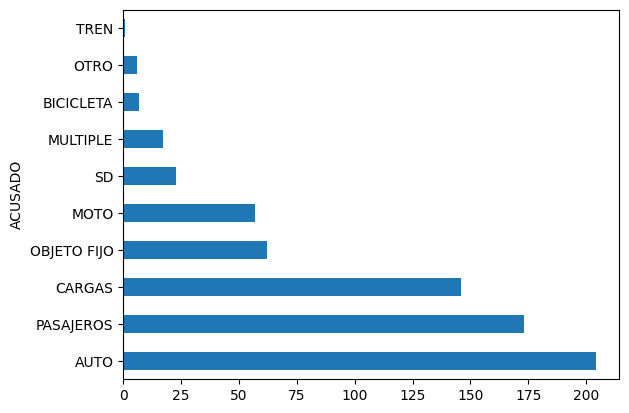

In [34]:
acusados.plot(kind="barh")

    gracias a este analisis:
* me di cuenta de que "pasajeros" sale como un valor en acusado pero segun su definicion pasajeros son las personas que resultan dañadas mientras viajan en transporte publico por lo que si hubiese algun suceso en donde pasajeros esta siendo considerado acusado puede que este haaciendo referencia a transporte publico/colectivo en este caso al tratarse de la ciudad de buenos aires tendre que cambiar caulquier registro que tengaa pasajeros como acusado aa colectivo/autobus o transporte publico

* la mayor cantidad de los accidentes el acusado es  un auto
* hay varios valores SD donde puede ocurrir que no se sepa quien es el acusado debido a que puede haber chocado y huir
* la menor cantidad de accidentes se atribuye a los trenes

## distribucion de victimas de accidentes

In [35]:
homicidios_hechos["VICTIMA"].value_counts()#cantidad de registros para cada valor de victima

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [36]:
victimas = homicidios_hechos["VICTIMA"].value_counts()

<Axes: ylabel='VICTIMA'>

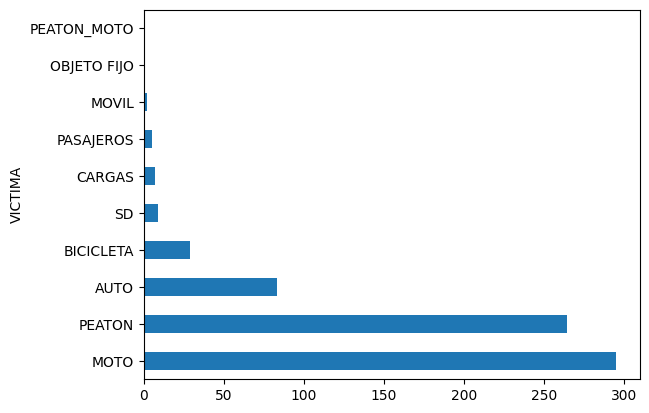

In [37]:
victimas.plot(kind="barh")

    gracias a este analisis podemos notar:
* las motos y los peatones representan la mayor cantidad de victimas de nuestros datos
* podemos notar los valores raros de los que ya habia hablado peaton_moto(valor incohernete posible error de tipeo) y objeto fijo como victima lo que ya dijimos que no podemos considerar victima a un objeto fijo y al revisar participantes vimos que los registros victima y acusado se encontraban en orden incorrecto
*hay valores SD(sin dato) que dependiendo la manera en la que se recogieron los datos puede ser que se hayan perdido estos campos lo que no significa que no haya sucedido un suceso por lo cual no lo borrare

## participantes con mas frecuencia en siniestros viales

In [38]:
homicidios_hechos["PARTICIPANTES"].value_counts()# cantidad para cada par de participantes(victima-acusado)

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
PEATON-SD                4
CARGAS-CARGAS            4
PASAJEROS-PASAJEROS      3
MOTO-MOVIL               2
MOTO-BICICLETA           2
MOTO-OTRO                2
SD-AUTO                  2
PEATON_MOTO-MOTO         1
AUTO-MOVIL               1
SD-CARGAS                1
SD-MOTO                  1
BICICLETA-OTRO           1
PASAJEROS-SD             1
PASAJEROS-AUTO           1
MOVIL-PASAJEROS          1
CARGAS-PASAJER

In [39]:
participantes = homicidios_hechos["PARTICIPANTES"].value_counts()

<Axes: ylabel='PARTICIPANTES'>

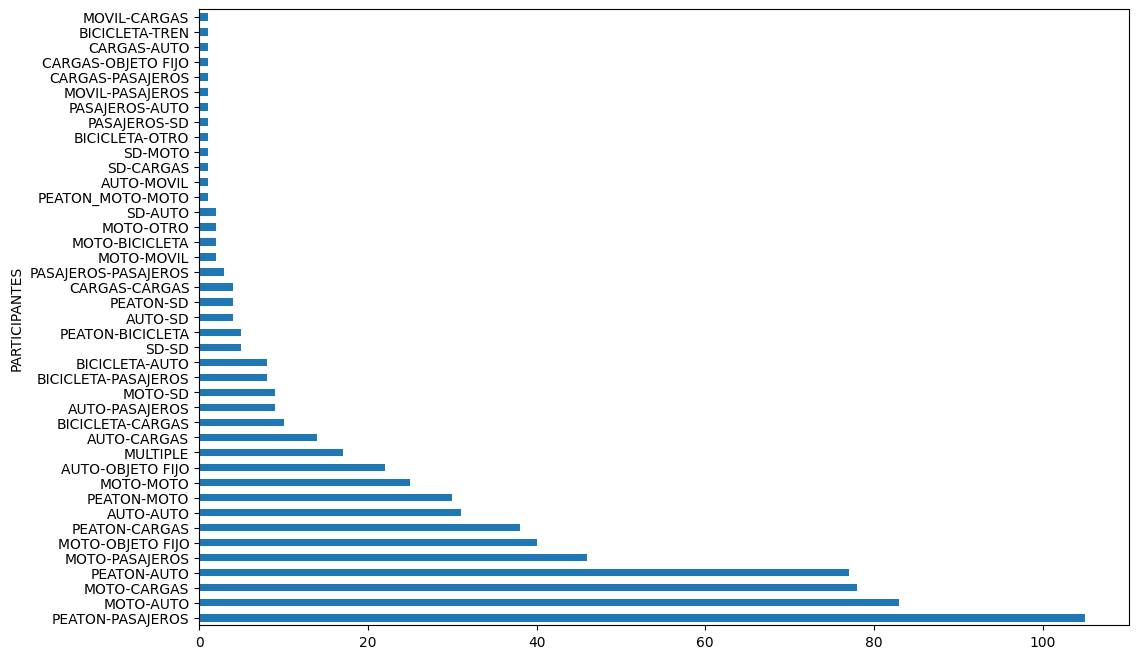

In [40]:
plt.figure(figsize=(12, 8))
participantes.plot(kind="barh",)

* podemos ver que el que mas se repite es peaton_pasajeros (esto podemos considerarlo como peaton colectivo)
* tambien si dejamos de lado esto, vemos que en muchos de los valores estan moto-acusado lo que nos reconfirma que las mayor cantidad de victimas son motos y la segunda peatones

## siniestros viales por comuna

In [41]:
homicidios_hechos["COMUNA"].value_counts()# cantidad de registros para cada comuna

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

In [42]:
siniestros_comuna = homicidios_hechos["COMUNA"].value_counts()

<Axes: ylabel='COMUNA'>

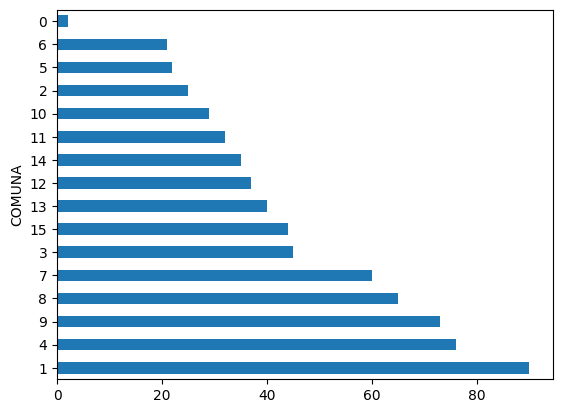

In [43]:
siniestros_comuna.plot(kind="barh")

    en este grafico:
* vemos las  cantidad de registros asignados a cada comuna
* 2 valores con comuna 0 ya que estos no poseian coordenadas

## numero de registros por franja horaria (para saber a que hora hubo mas accidentes)

In [44]:
homicidios_hechos["HH"].value_counts()#cantidad de accidentes por franja horaria (este campo es parecido a redondear la hora hacia abajo)

HH
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
22    30
16    30
17    30
19    30
21    29
23    28
11    27
20    26
3     26
15    25
1     24
0     23
4     23
13    17
2     17
SD     1
Name: count, dtype: int64

In [45]:
registros_hora = homicidios_hechos["HH"].value_counts()#cantidad de registros para cada franja horaria

<Axes: ylabel='HH'>

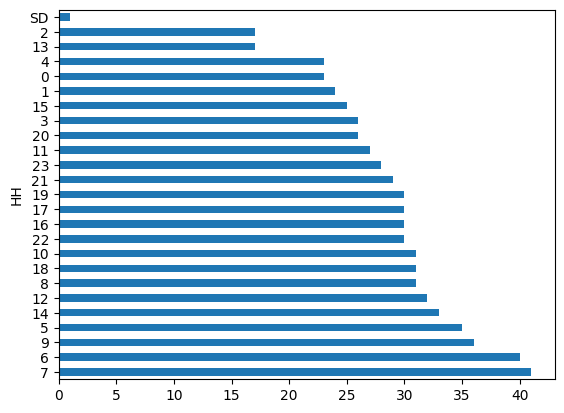

In [46]:
registros_hora.plot(kind="barh")

    podemos notar:
* la mayor cantidad se encuentra entre las 6 y 7 am
* tenemos valores con 0 los que ya comprobe que deberian tener el valor 12 am esto podria cambiar el valor a que el con mas frecuencia sea 12
* tambien poseemos campos sin dato estos puede que se puedan rellenar con laa columna hora o simplemente ignorarlos para no perder registros esto sin incluirlo en los graficos finales

## frecuencia cantidad de victimas por registro

In [47]:
homicidios_hechos["N_VICTIMAS"].value_counts()#cantidad de siniestros viales con x cantidad de victimas(siendo el primero la cantidad de victimas y el segundo la cantidad de veces que hubo esa cantidad)

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

In [48]:
registro_nvictimas = homicidios_hechos["N_VICTIMAS"].value_counts()

<Axes: ylabel='N_VICTIMAS'>

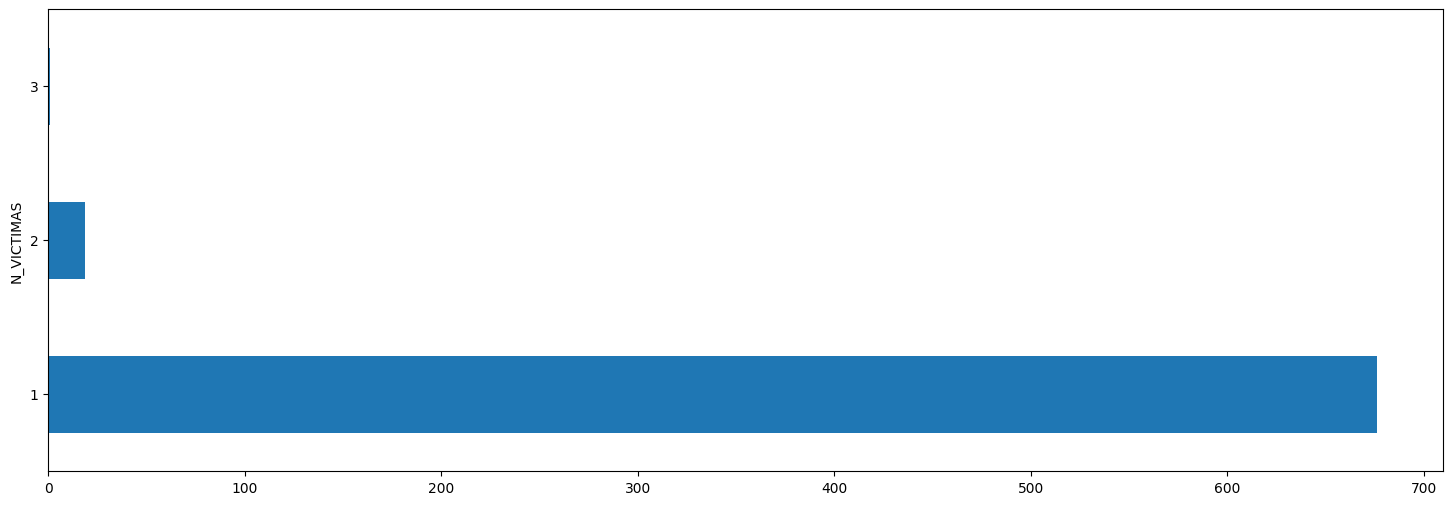

In [49]:
plt.figure(figsize=(18, 6))
registro_nvictimas.plot(kind="barh")

    podemos ver que:
* la mayor cantidad de accidentes poseen 1 sola victima
* mientras que hay muy pocos registros para accidentes con 2 victimas y aun menos para 3

## valores "pos x" y "pos y" (coordenadas)

    debido a que los datos requieren muchos procesos de limpieza no es posible graficar en folium por lo que lo grafique en power bi y lo traje aqui

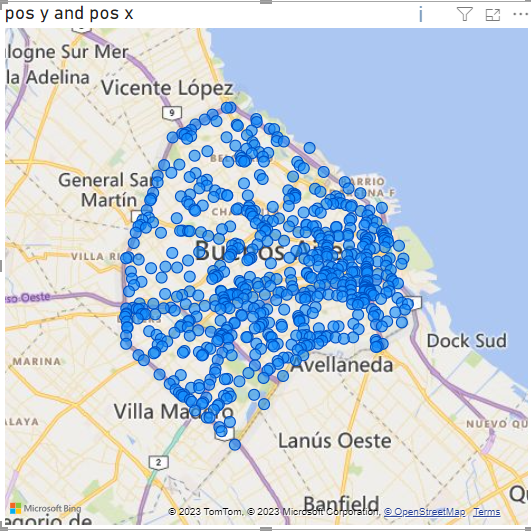

podemos ver que no hay problemas en las coordenadas ya que solo hay coordenadas de buenos aires y los valores sin coordenadas no los grafica

## cantidad de accidentes por año

In [50]:
homicidios_hechos["AAAA"].value_counts()#año cantidad de registros ese año

AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64

In [51]:
accidentes_año = homicidios_hechos["AAAA"].value_counts()

<Axes: ylabel='AAAA'>

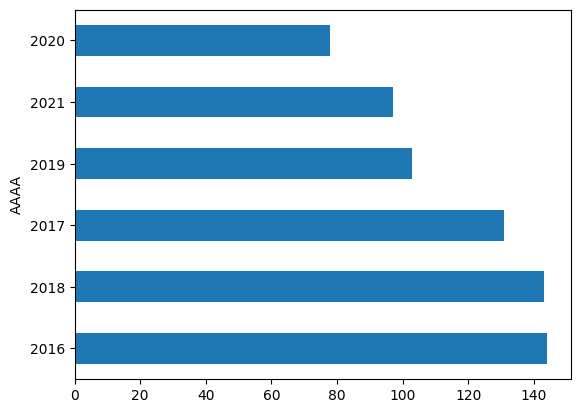

In [75]:
accidentes_año.plot(kind="barh")

    podemos notar:
* que la cantidad de accidentes se redujo entre 2016 y 2021(esto suponiendo que tenemos datos que realmente demuestran el comportamiento de la frecuencia de siniestros viales)
* pero en 2021 aun asi es mayor que en 2020
* tambien ocurre algo similar con 2018 y 2017


* en el 2020 se tomaron medidas preventivas por el covid lo que redujo en gran medida la cantidad de siniestros viales aunque nuestros datos no demuestran que hayan disminuido tanto como en otras fuentes podemos decir que debido a que fue durante una situacion donde se tomaron medidas "preventivas y obligatorias" lo que causo que estos se redujeran y lo normal seria que al salir de esta situacion la cantidad de casos vuelvan a un estado no tan controlado que aun asi es menor a el año anterior al covid

* en todos los casos no podemos afirmar que la cantidad de siniestros viales haya reducido en cierto porcentaje ya que deberiamos saber acerca de la circulacion de vehiculos en esos años. por ejemplo(en 2018 hay mayor cantidad de siniestros viales que en el año anterior a ese, esto puede ser debido a que en 2018 pudo haber mas circulacion en las calles(esto es una teoria pero esto puede explicar el porque el descenso de accidentes y a su vez tambien puede ser que la circulacion en vehiculos haya disminuido por otros factores como puede ser el precio o la criminalidad(robo de las mismas)))

## siniestros por año y mes

<Axes: title={'center': 'siniestros viales por mes'}, ylabel='Frequency'>

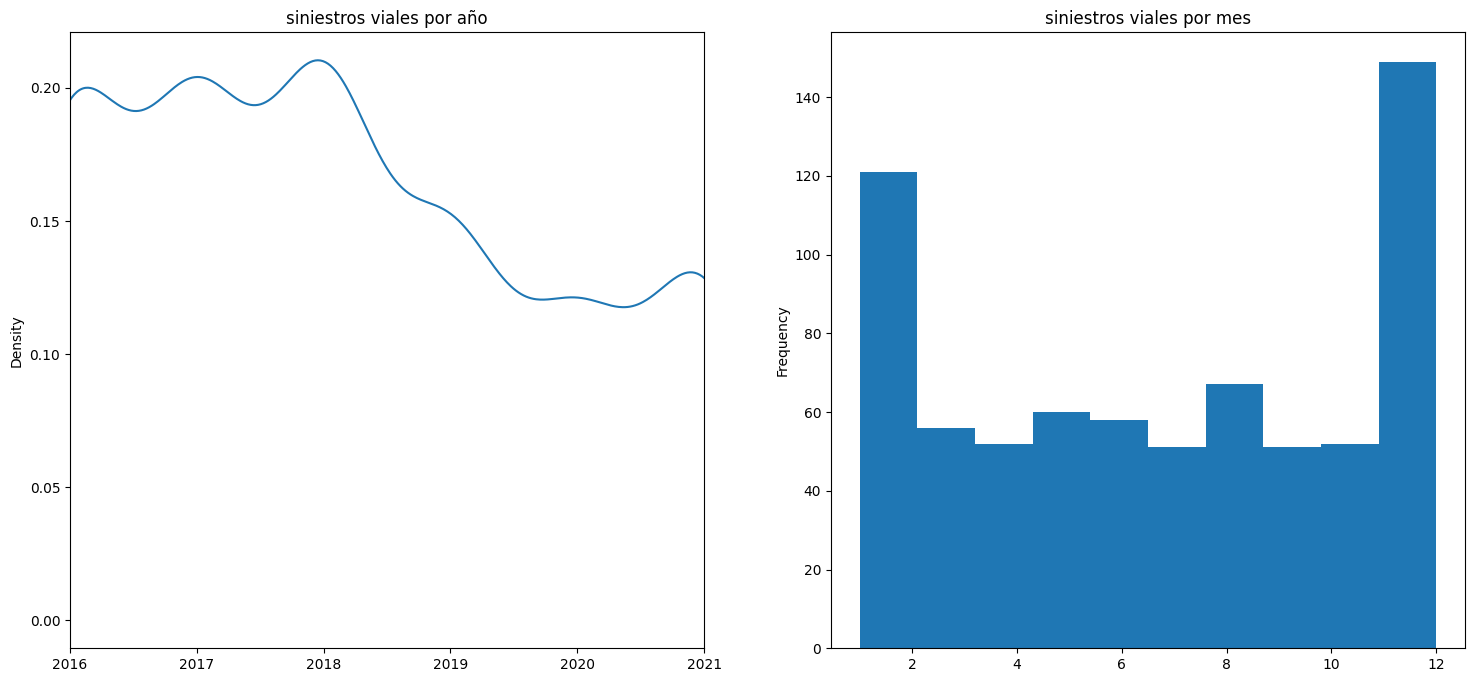

In [78]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title("siniestros viales por año")
homicidios_victimas["AAAA"].plot(kind="density")
plt.xlim(2016, 2021)
plt.subplot(1,2,2)
plt.title("siniestros viales por mes")
homicidios_victimas["MM"].plot(kind="hist")


    con estos graficos:
* los comportamientos en cuanto a registros por año algo muy similar al de arriba pero en este solo representamos las densidades para saber donde aumentan y donde bajan las cantidades
* y la frecuencia de registros de victimas por mes donde podemos notar que hay mayor cantidad de registros en el mes 1(enero) y el mes 12(diciembre). esto puede que este relacionado a que para estos meses (navidad,fin de año y año nuevo) haya mayor circulacion por las calles lo que puede llegar a aumentar la cantidad de siniestros viales

## resultados de victimas en siniestros viales

In [80]:
porcentaje_fechas = (homicidios_victimas['FECHA_FALLECIMIENTO'] != 'SD').mean() * 100
porcentaje_sd = (homicidios_victimas['FECHA_FALLECIMIENTO'] == 'SD').mean() * 100

Text(0.5, 1.0, 'Porcentaje de siniestros viales Fatales')

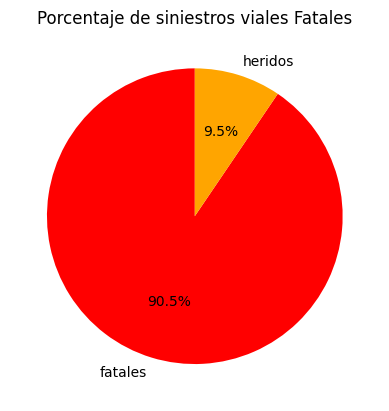

In [84]:
labels = ['fatales', 'heridos']
sizes = [porcentaje_fechas, porcentaje_sd]
colors = ['red', 'orange']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Porcentaje de siniestros viales Fatales')

    podemos notar:
* que el 90% de nuestros registros de accidentes resultaron fatales

## roles de las victimas

<Axes: ylabel='ROL'>

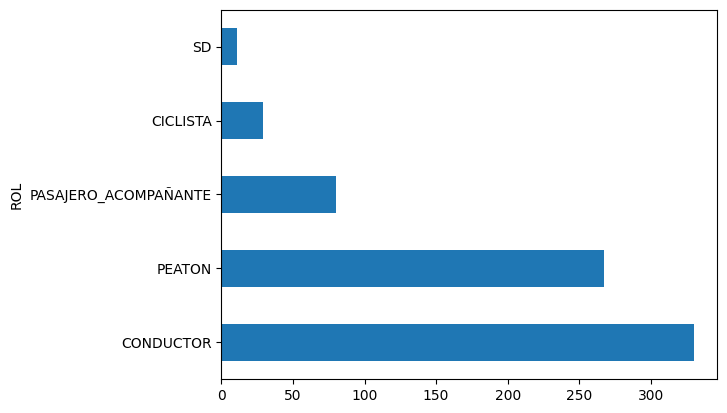

In [87]:
homicidios_victimas["ROL"].value_counts().plot(kind="barh")

    podemos notar:
* que la mayor cantidad de victimas en siniestros viales son el conductor de el vehiculo perjudicado (esto debe ser ya que conductor contiene varias categorias como podrian ser moto,auto y otros vehiculos motorizados que salgan en nuestro registros de victima en el dataframe de hechos) y peatones
* podemos observar al categoria pasajero_acompañante la que si bien es bastante reducida comparada estas 2 anteriores pero podria estar ligada al tipo de vehiculo por ejemplo las victimas que eran pasajero_acompañante en una moto tienen mayor posibilidad de salir heridas y dependiendo otros factores incluso perder la vida
* tambien estan los valores "SD"(sin datos) los cuales no son relevantes para este analisis ya que no poseen el dato

Text(0, 0.5, 'Frecuencia')

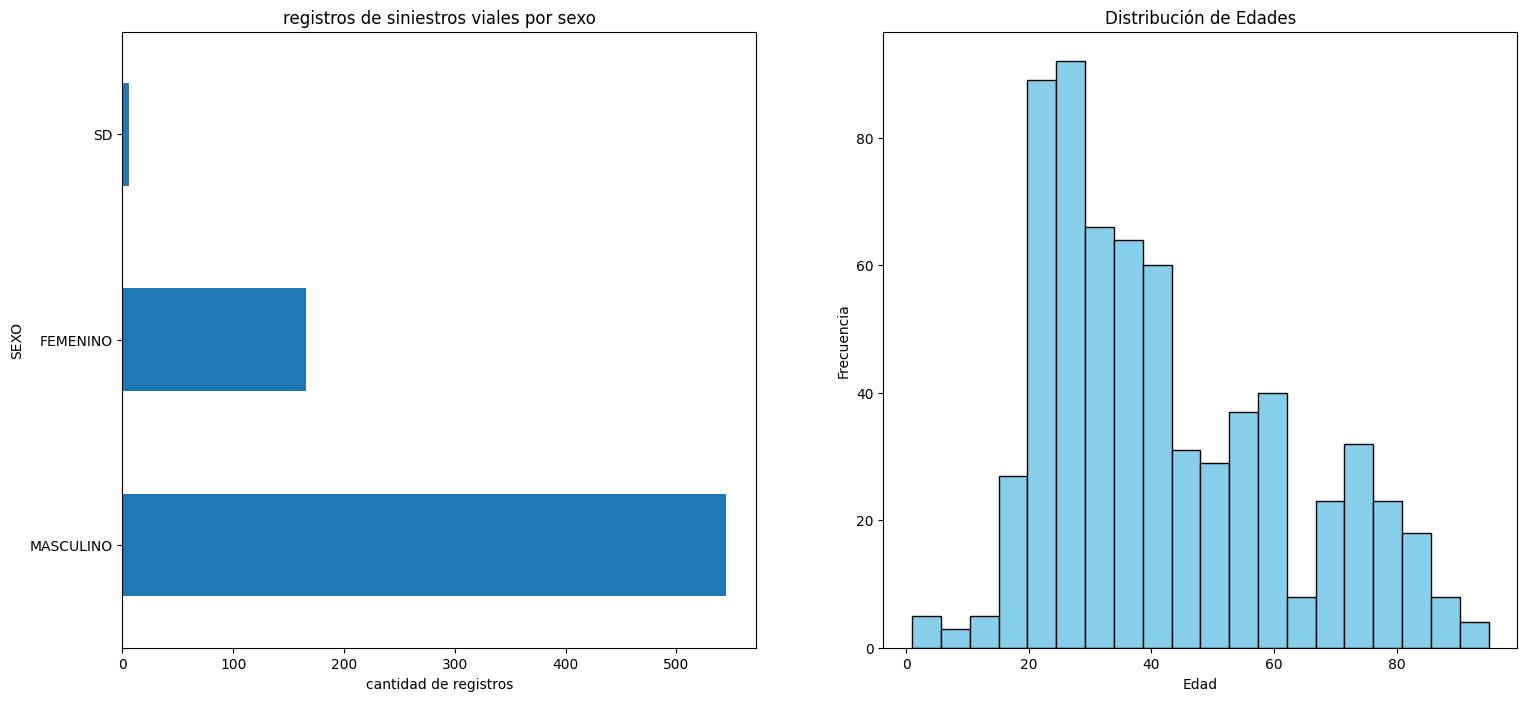

In [107]:
#columna edad limpia para graficar frecuencias de forma ordenada
df = pd.DataFrame()
df['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')
edades_validas = df['EDAD'].dropna()

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
homicidios_victimas["SEXO"].value_counts().plot(kind="barh")
plt.title("registros de siniestros viales por sexo")
plt.xlabel('cantidad de registros')
plt.subplot(1,2,2)
plt.hist(edades_validas, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

    podemos notar:
* que la mayoria de victimas en accidentes viales son de sexo masculino
* tambien poseemos valores sin dato que vamos a ignorar debido a que puede ocurrir que falten estos valores

* las victimas de siniestros viales son mas frecuentes entre 20 y 40 años
* la mayor cantidad se da ebtre 20 y 30 años aproximadamente